In [1]:
# importing necessary libraries for avoiding warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import necessary libraries for importing and understanding the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# importing the necessary libraries for model building
import sklearn
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Data Inspection

In [4]:
# Reading the data into dataframes
admission_dataframe =  pd.read_csv('Admission_Predict_Ver1.1.csv')

In [5]:
# analyzing the data
admission_dataframe.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


- In the above dataframe Chance of Admit is the target variable and rest other are predictor variables.

In [6]:
# Checking the shape of the dataframe
admission_dataframe.shape

(500, 9)

In [7]:
# checking the info about the columns of the dataframe
admission_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


- From the above information we can see that there exists no null values in the columns.
- Also we can see that the data types of the columns have been correctly mapped to their respective data types.
- All the colunmns are numerical variables expect the column Research which can ordinal categorical variable which is encoded with 1's and 0's
- Since the target variable is quantitative variable we use regression techniques to predict the value.

In [8]:
# analyzing the summary statistics of the numerical columns of the dataframe
admission_dataframe[['GRE Score', 'TOEFL Score','CGPA', 'SOP', 'LOR ', 'University Rating' ]].describe()

,GRE Score,TOEFL Score,CGPA,SOP,LOR,University Rating
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,316.472000,107.192000,8.576440,3.374000,3.48400,3.114000
std,11.295148,6.081868,0.604813,0.991004,0.92545,1.143512
min,290.000000,92.000000,6.800000,1.000000,1.00000,1.000000
25%,308.000000,103.000000,8.127500,2.500000,3.00000,2.000000
50%,317.000000,107.000000,8.560000,3.500000,3.50000,3.000000
75%,325.000000,112.000000,9.040000,4.000000,4.00000,4.000000
max,340.000000,120.000000,9.920000,5.000000,5.00000,5.000000


- From the above statistical description of the numerical column we can have an idea about the descriptive statistics value information of the numerical columns in the data.
- Upon observing the quantile distribution of the columns we can most of the columns have almost normal distribution spread as their median values and the max values are close to each other.

In [9]:
# checking the columns present in the dataframe
admission_dataframe.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
# analyzing the array of the values of the data
admission_dataframe.values

array([[  1.  , 337.  , 118.  , ...,   9.65,   1.  ,   0.92],
       [  2.  , 324.  , 107.  , ...,   8.87,   1.  ,   0.76],
       [  3.  , 316.  , 104.  , ...,   8.  ,   1.  ,   0.72],
       ...,
       [498.  , 330.  , 120.  , ...,   9.56,   1.  ,   0.93],
       [499.  , 312.  , 103.  , ...,   8.43,   0.  ,   0.73],
       [500.  , 327.  , 113.  , ...,   9.04,   0.  ,   0.84]])

### EDA

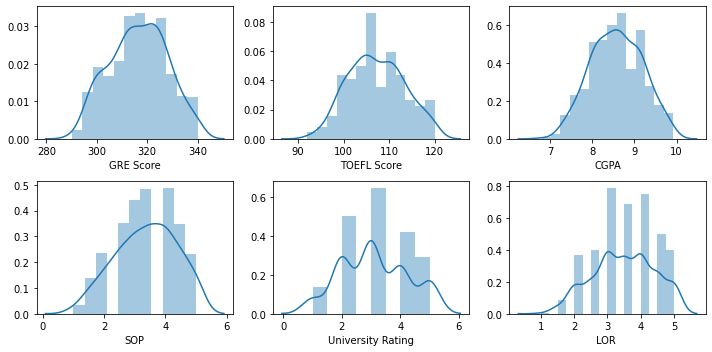

In [11]:
# analyzing the distributions of numerical columns of the dataframe
plt.figure(figsize = (10,5)) #(Width, height) in figsize
plt.subplot(2,3,1)
sns.distplot(admission_dataframe['GRE Score'])
plt.subplot(2,3,2)
sns.distplot(admission_dataframe['TOEFL Score'])
plt.subplot(2,3,3)
sns.distplot(admission_dataframe['CGPA'])
plt.subplot(2,3,4)
sns.distplot(admission_dataframe['SOP'])
plt.subplot(2,3,5)
sns.distplot(admission_dataframe['University Rating'])
plt.subplot(2,3,6)
sns.distplot(admission_dataframe['LOR '])
plt.tight_layout()
plt.show()

- From the distributions we can see that the distributions are centered across their mean value mostly and the distributions are almost normal distributions though they have some spikes in distribution.

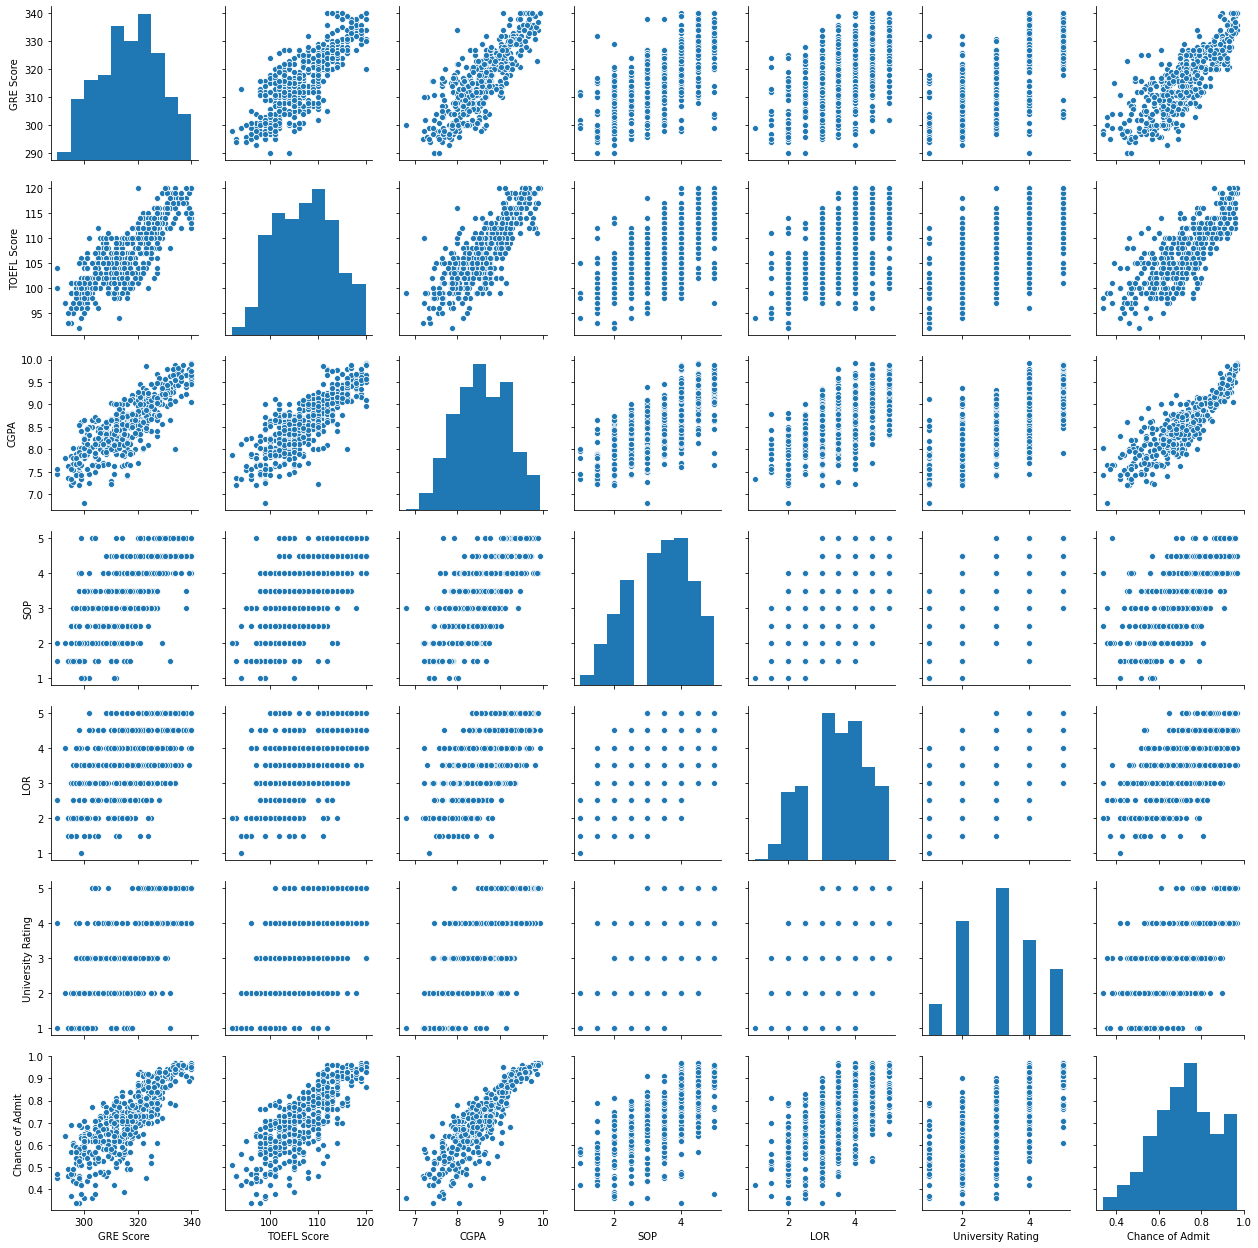

In [12]:
# analyzing the pair plot distibutions of the numerical variables
sns.pairplot(admission_dataframe[['GRE Score', 'TOEFL Score', 'CGPA', 'SOP', 'LOR ', 'University Rating' ,'Chance of Admit ']])

- The reason for plotting pair plots is we can get to know whether there exists amy linear relationship between the target variable and the predictors variables. Knowing so, we will get to confirmation whether we can built linear regression model using these predictor variables.
- From the above visualization we can see that there exists some positive correlation between the taregt variable and the predictor variables. Hence the data in hand is perfectly suitable for building a linear regression predictive model.
- At the same time, the predictor variables are also strongly correlated with each other. Which again raises the issue of multicollinearity which can be handled during modelling.<br><br>
The pair plot just determines the scatter plot visualizations between pairs of numerical variables. In order to understand the quantified relationships between the variables we can check for heatmap.

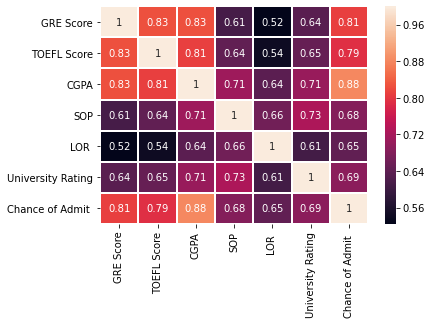

In [13]:
# plotting the heat map between the numerical variables
matrix = admission_dataframe[['GRE Score', 'TOEFL Score', 'CGPA', 'SOP', 'LOR ', 'University Rating' ,'Chance of Admit ']].corr()
# plotting the heatmap using seaborn
sns.heatmap(matrix, annot = True, linecolor= 'white', linewidths= 1)

- From the heat map we have an quantified correlations between pairs of numerical variables of the data.
- We can see that predictor variables are strongly correlated among each others.
- Also there exists strong positive correlation between target and the predictor variables.

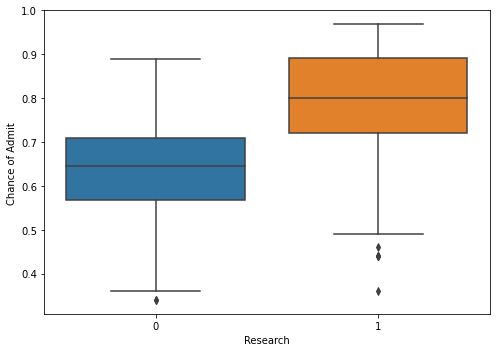

In [14]:
# analyzing the variation between categorical variables in relation with target variables
plt.figure(figsize=(7,5))
sns.boxplot(admission_dataframe['Research'], admission_dataframe['Chance of Admit '])
plt.tight_layout()
plt.show()

- From the above plot we can see that variation Research variable in relation with target variable. The median value of people having done Research is higher when compared to people who didn't perform any Research activity. Thus people having done Reseach have higher chnaces getting a admission.

###  Data Preparation

In [15]:
# analyzing the dataframe again
admission_dataframe.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


__The steps involved in Data Preparation as follows :__
- Train Test Split of the data
- Rescaling of the features in order to bring all the feature variables into single scale for better interpretation of variables in relation with target variable over other variables
- Since we don't have any categorical variables we no need to perform one hot encoding or the dummy encoding process.

In [16]:
# Performing Train Test split
df_train, df_test = train_test_split(admission_dataframe, train_size = 0.70, test_size = 0.30, random_state = 100)

In [17]:
# checking the shapes of train and test dataframe
print(df_train.shape, df_test.shape)

(350, 9) (150, 9)


In [18]:
# Dropping the column serial number as it will be no use in modelling
df_train.drop('Serial No.', axis = 1, inplace = True)
df_test.drop('Serial No.', axis =1, inplace = True)

In [19]:
# checking the df_train
df_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
153,324,105,3,3.0,4.0,8.75,0,0.79
84,340,115,5,4.5,4.5,9.45,1,0.94
310,320,104,3,3.0,3.5,8.74,1,0.76
494,301,99,3,2.5,2.0,8.45,1,0.68
126,323,113,3,4.0,3.0,9.32,1,0.85


In [20]:
# Scaling the features of the dataframe

# initiating the scaler object
scaler = MinMaxScaler()

# fittting and transforming the data on top of the scaler object for the training data set
df_train[::] = scaler.fit_transform(df_train)

In [21]:
# checking the dataframe after scaling the variables
df_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
153,0.68,0.464286,0.5,0.500,0.750,0.625000,0.0,0.714286
84,1.00,0.821429,1.0,0.875,0.875,0.849359,1.0,0.952381
310,0.60,0.428571,0.5,0.500,0.625,0.621795,1.0,0.666667
494,0.22,0.250000,0.5,0.375,0.250,0.528846,1.0,0.539683
126,0.66,0.750000,0.5,0.750,0.500,0.807692,1.0,0.809524


In [22]:
# checking the describe of the dataframe to check whether scaling has been done or not
df_train.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.530286,0.546224,0.526429,0.597500,0.626071,0.577509,0.568571,0.607029
std,0.225705,0.214275,0.283592,0.241813,0.225617,0.188555,0.495985,0.222051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360000,0.392857,0.250000,0.375000,0.500000,0.439904,0.000000,0.460317
50%,0.520000,0.535714,0.500000,0.625000,0.625000,0.583333,1.000000,0.603175
75%,0.680000,0.714286,0.750000,0.750000,0.750000,0.717949,1.000000,0.761905
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Since we have used the min-max scaler we can see that all the max values of the variables are 1.0. Since we have fitted and transformed on the same training dataset we can see max values as 1.0.

- Let's start the model building process using the Manual selection method. In which we will be using top down approach or the backward selection method. In which we will be considering all the features at a time and perform manual feature elimination step by step taking into consideration of p values and VIF values of the coefficients.
- Before building the model we need to create X_train and y_train out of df_train dataset.

In [23]:
# creating X_train and y_train
y_train = df_train.pop('Chance of Admit ')
X_train =  df_train

In [24]:
# checking X_train 
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
153,0.68,0.464286,0.5,0.500,0.750,0.625000,0.0
84,1.00,0.821429,1.0,0.875,0.875,0.849359,1.0
310,0.60,0.428571,0.5,0.500,0.625,0.621795,1.0
494,0.22,0.250000,0.5,0.375,0.250,0.528846,1.0
126,0.66,0.750000,0.5,0.750,0.500,0.807692,1.0


In [25]:
# checking y_train
y_train.head()

153    0.714286
84     0.952381
310    0.666667
494    0.539683
126    0.809524
Name: Chance of Admit , dtype: float64

### Model Building

#### First Model

In [26]:
# adding constant to X_train as statsmodel in built doesn't add constant
X_train_sm = sm.add_constant(X_train)

# creating the model object
lr_model_1 = sm.OLS(y_train, X_train_sm)

# fitting the model on top of the data
lr_model_1 = lr_model_1.fit()

# checking the summary statistics of the model
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     212.8
Date:                Mon, 22 Jun 2020   Prob (F-statistic):          1.71e-120
Time:                        12:02:34   Log-Likelihood:                 324.22
No. Observations:                 350   AIC:                            -632.4
Df Residuals:                     342   BIC:                            -601.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0034      0.018     -0.183      0.855      -0.039       0.033
GRE Score             0.0897      0.050      1.788      0.075      -0.009       0.188
TOEFL Score           0.1561      0.047      3.340      0.001       0.064       0.248
University Rating     0.0332      0.029      1.153      0.250      -0.023       0.090
SOP                   0.0035      0.035      0.099      0.921      -0.066       0.073
LOR                   0.1094      0.032      3.389      0.001       0.046       0.173
CGPA                  0.6313      0.060     10.575      0.000       0.514       0.749
Research              0.0438      0.013      3.433      0.001       0.019       0.069
==============================================================================
Omnibus:                       84.653   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.880
Skew:                          -1.181   Prob(JB):                     8.81e-45
Kurtosis:                       5.887   Cond. No.                         24.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- from the above summary statistics of the model we can see that there are some features which are insignificant as per their p values and also the R square value si terribly high which is an indication that model has overfitted on the training dataset rather than identifying generalised patterns in the traning dataset. In order to avoid overfitting problem we need to make the model light by removing some of the insignificant features from the model so that model will be kind of balanced between the bias and variance.

In [27]:
# checking the VIF values

# creating the dataframe of the VIF values
VIF = pd.DataFrame()

# adding column to the VIF dataframe for columns of the X_train
VIF['features'] = X_train.columns

# adding column for the VIF values of the features
VIF['VIF_value'] =  [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# sorting the dataframe based on VIF_value
VIF.sort_values('VIF_value', ascending= False, inplace = True)

# checking the dataframe
VIF

,features,VIF_value
5,CGPA,43.120643
0,GRE Score,30.981844
1,TOEFL Score,27.801801
3,SOP,19.343677
4,LOR,15.513745
2,University Rating,10.565327
6,Research,3.431487


__Steps involved in Manual Feature Elimination are:__
- check for the variables having high vif and high p values so that they can be dropped
- check for the variables having high p value and low vif so that they can be dropped
- check for the variables having low p value and high vif which can be dropped once the variables having high p value and low vif are dropped. Doing so, the variables having high vif value will be dropped upon rebuilding the model.

- As the above summary statistics of the model and VIF values we can see that SOP feature has high p value and realtively low vif value when compared to other features. Hence it is better to drop first the insignificant features so that the features having vif values can evidence the decrease in vif value.

In [28]:
# dropping SOP from X_train
X_train.drop('SOP', axis = 1, inplace = True)

#### Model 2

In [29]:
# adding constant to X_train as statsmodel in built doesn't add constant
X_train_sm = sm.add_constant(X_train)

# creating the model object
lr_model_2 = sm.OLS(y_train, X_train_sm)

# fitting the model on top of the data
lr_model_2 = lr_model_2.fit()

# checking the summary statistics of the model
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     248.9
Date:                Mon, 22 Jun 2020   Prob (F-statistic):          1.05e-121
Time:                        12:02:35   Log-Likelihood:                 324.21
No. Observations:                 350   AIC:                            -634.4
Df Residuals:                     343   BIC:                            -607.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0032      0.018     -0.176      0.860      -0.039       0.033
GRE Score             0.0896      0.050      1.789      0.074      -0.009       0.188
TOEFL Score           0.1565      0.047      3.361      0.001       0.065       0.248
University Rating     0.0343      0.027      1.272      0.204      -0.019       0.087
LOR                   0.1104      0.031      3.594      0.000       0.050       0.171
CGPA                  0.6324      0.059     10.801      0.000       0.517       0.748
Research              0.0439      0.013      3.445      0.001       0.019       0.069
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.210
Skew:                          -1.179   Prob(JB):                     1.23e-44
Kurtosis:                       5.882   Cond. No.                         22.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From tha above summary statistics still we can find some of the features which are insignificant. Also the R square value of the model still considerably high. Let's look at the VIF values of the features before dropping the features.

In [30]:
# checking the VIF values

# creating the dataframe of the VIF values
VIF = pd.DataFrame()

# adding column to the VIF dataframe for columns of the X_train
VIF['features'] = X_train.columns

# adding column for the VIF values of the features
VIF['VIF_value'] =  [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# sorting the dataframe based on VIF_value
VIF.sort_values('VIF_value', ascending= False, inplace = True)

# checking the dataframe
VIF

,features,VIF_value
4,CGPA,40.832484
0,GRE Score,30.966898
1,TOEFL Score,27.615709
3,LOR,13.638285
2,University Rating,9.309130
5,Research,3.426747


- As per above summary statistics and the VIF values we can see that there are some features having low p values and high vif values and also features having high p value and low vif values. But as per the call we proceed to drop the features having high p value and low vif first and then again look at the features having vif values after rebuilding the model.

In [31]:
# Dropping Univeristy Rating from X_train
X_train.drop('University Rating', axis = 1, inplace = True)

#### Model 3

In [32]:
# adding constant to X_train as statsmodel in built doesn't add constant
X_train_sm = sm.add_constant(X_train)

# creating the model object
lr_model_3 = sm.OLS(y_train, X_train_sm)

# fitting the model on top of the data
lr_model_3 = lr_model_3.fit()

# checking the summary statistics of the model
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     297.9
Date:                Mon, 22 Jun 2020   Prob (F-statistic):          1.29e-122
Time:                        12:02:35   Log-Likelihood:                 323.39
No. Observations:                 350   AIC:                            -634.8
Df Residuals:                     344   BIC:                            -611.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0077      0.018     -0.434      0.665      -0.043       0.027
GRE Score       0.0932      0.050      1.863      0.063      -0.005       0.192
TOEFL Score     0.1632      0.046      3.525      0.000       0.072       0.254
LOR             0.1213      0.030      4.111      0.000       0.063       0.179
CGPA            0.6488      0.057     11.352      0.000       0.536       0.761
Research        0.0450      0.013      3.539      0.000       0.020       0.070
==============================================================================
Omnibus:                       83.012   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.745
Skew:                          -1.163   Prob(JB):                     1.89e-43
Kurtosis:                       5.843   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From the above summary statistics we can see that all the features are significant as per their p values. But still the R square value is very high which is an indication that the model is still overfitting on the training dataset. Let's look at the VIF values before taking any call for dropping a particular feature.

In [33]:
# checking the VIF values

# creating the dataframe of the VIF values
VIF = pd.DataFrame()

# adding column to the VIF dataframe for columns of the X_train
VIF['features'] = X_train.columns

# adding column for the VIF values of the features
VIF['VIF_value'] =  [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# sorting the dataframe based on VIF_value
VIF.sort_values('VIF_value', ascending= False, inplace = True)

# checking the dataframe
VIF

,features,VIF_value
3,CGPA,39.747116
0,GRE Score,30.810238
1,TOEFL Score,27.355280
2,LOR,12.920618
4,Research,3.402754


- We can see that some of the features having insignificant p values. Let's drop such features having high p value and low vif values.

In [34]:
# Dropping CGPA from X_train
X_train.drop('GRE Score', axis = 1, inplace = True)

#### Model 4

In [35]:
# adding constant to X_train as statsmodel in built doesn't add constant
X_train_sm = sm.add_constant(X_train)

# creating the model object
lr_model_4 = sm.OLS(y_train, X_train_sm)

# fitting the model on top of the data
lr_model_4 = lr_model_4.fit()

# checking the summary statistics of the model
lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     368.8
Date:                Mon, 22 Jun 2020   Prob (F-statistic):          3.53e-123
Time:                        12:02:35   Log-Likelihood:                 321.63
No. Observations:                 350   AIC:                            -633.3
Df Residuals:                     345   BIC:                            -614.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0103      0.018     -0.575      0.566      -0.045       0.025
TOEFL Score     0.2032      0.041      4.935      0.000       0.122       0.284
LOR             0.1149      0.029      3.905      0.000       0.057       0.173
CGPA            0.7001      0.050     13.928      0.000       0.601       0.799
Research        0.0530      0.012      4.410      0.000       0.029       0.077
==============================================================================
Omnibus:                       77.243   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.874
Skew:                          -1.115   Prob(JB):                     1.30e-37
Kurtosis:                       5.583   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From above summary statistics we can see that all the features are significant as per teir p values. But the R square value is still on a higher side. Having such high value will be problem for the model prediction on a unseen dataset. Let's look at the VIF values before taking any call for dropping the features so as to make the model light.

In [36]:
# checking the VIF values

# creating the dataframe of the VIF values
VIF = pd.DataFrame()

# adding column to the VIF dataframe for columns of the X_train
VIF['features'] = X_train.columns

# adding column for the VIF values of the features
VIF['VIF_value'] =  [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# sorting the dataframe based on VIF_value
VIF.sort_values('VIF_value', ascending= False, inplace = True)

# checking the dataframe
VIF

,features,VIF_value
2,CGPA,30.355510
0,TOEFL Score,21.553903
1,LOR,12.632170
3,Research,2.998256


- We can still see some of the features having high VIF values. Let's drop the feature having highest VIF in order to make the model light and free from overfitting.

In [37]:
# Dropping TOEFL Score from X_train
X_train.drop('CGPA', axis = 1, inplace = True)

#### Model 5

In [38]:
# adding constant to X_train as statsmodel in built doesn't add constant
X_train_sm = sm.add_constant(X_train)

# creating the model object
lr_model_5 = sm.OLS(y_train, X_train_sm)

# fitting the model on top of the data
lr_model_5 = lr_model_5.fit()

# checking the summary statistics of the model
lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     274.2
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           4.53e-91
Time:                        12:02:35   Log-Likelihood:                 243.55
No. Observations:                 350   AIC:                            -479.1
Df Residuals:                     346   BIC:                            -463.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0762      0.021      3.640      0.000       0.035       0.117
TOEFL Score     0.5862      0.038     15.333      0.000       0.511       0.661
LOR             0.2668      0.034      7.826      0.000       0.200       0.334
Research        0.0768      0.015      5.174      0.000       0.048       0.106
==============================================================================
Omnibus:                       34.816   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.016
Skew:                          -0.773   Prob(JB):                     4.56e-10
Kurtosis:                       3.748   Cond. No.                         9.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From the above summary statistics we can see that all the features are statistically significant.

In [39]:
# checking the VIF values

# creating the dataframe of the VIF values
VIF = pd.DataFrame()

# adding column to the VIF dataframe for columns of the X_train
VIF['features'] = X_train.columns

# adding column for the VIF values of the features
VIF['VIF_value'] =  [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# sorting the dataframe based on VIF_value
VIF.sort_values('VIF_value', ascending= False, inplace = True)

# checking the dataframe
VIF

,features,VIF_value
0,TOEFL Score,10.100513
1,LOR,8.833425
2,Research,2.961005


- We can see that features are significant as per p values. In order to make the model further light let's drop the feature having high vif value.

In [40]:
# Dropping Research from X_train
X_train.drop('TOEFL Score', axis = 1, inplace = True)

#### Model 6

In [41]:
# adding constant to X_train as statsmodel in built doesn't add constant
X_train_sm = sm.add_constant(X_train)

# creating the model object
lr_model_6 = sm.OLS(y_train, X_train_sm)

# fitting the model on top of the data
lr_model_6 = lr_model_6.fit()

# checking the summary statistics of the model
lr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           2.31e-53
Time:                        12:02:36   Log-Likelihood:                 152.82
No. Observations:                 350   AIC:                            -299.6
Df Residuals:                     347   BIC:                            -288.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2026      0.025      8.139      0.000       0.154       0.252
LOR            0.5021      0.039     12.749      0.000       0.425       0.580
Research       0.1585      0.018      8.845      0.000       0.123       0.194
==============================================================================
Omnibus:                       19.749   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.599
Skew:                          -0.562   Prob(JB):                     2.04e-05
Kurtosis:                       3.467   Cond. No.                         7.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From above summary statistics we can see that all the features are significant as per their p values. Let's look at their VIF values.

In [42]:
# checking the VIF values

# creating the dataframe of the VIF values
VIF = pd.DataFrame()

# adding column to the VIF dataframe for columns of the X_train
VIF['features'] = X_train.columns

# adding column for the VIF values of the features
VIF['VIF_value'] =  [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# sorting the dataframe based on VIF_value
VIF.sort_values('VIF_value', ascending= False, inplace = True)

# checking the dataframe
VIF

,features,VIF_value
1,Research,2.570044
0,LOR,2.570044


- As per summary statistics and vif values we can see that features are significant as per their p values and vif values which an indication that there doesn't exists any multicollinearity issue in the model. In order to check whether the model we have built was able to pick generalised patterns in the data or not we need to check on the test data set. If the performace of the model on the test dataset as well is close to train dataset performance then we can say that the model is kind of generalized but not an best model.

### Residual Analysis

In [43]:
# Making predictions on the train dataset
y_train_pred = lr_model_6.predict(X_train_sm)

In [44]:
# analyzing the y_train_pred
y_train_pred.head()

153    0.579160
84     0.800394
310    0.674858
494    0.486555
126    0.612091
dtype: float64

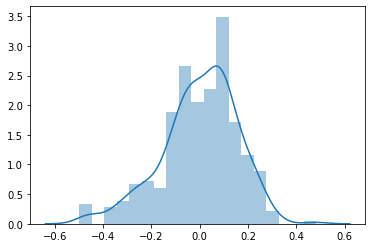

In [45]:
# checking the distribution of the error terms
res = y_train - y_train_pred
sns.distplot(res)

- From the above distribution we can see that the error terms are more of the sort normally distributed hence we have satisfied the assumption of error terms hould be normally distributed with mean 0 and some standard deviation. Also we have satisfied the assumption of homosadacity which says that there should be constant variance in the error terms from the above distribution.

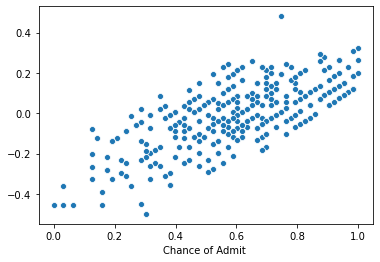

In [46]:
# checking for the assumption whether there exists any pattern in the error terms
plt.figure()
sns.scatterplot(y_train, res)
plt.show()

- The reason for plotting the error terms in relation with either y_train or y_test is to check whether there exists any visible pattern in the error terms or not. If there exists any visible pattern in the error terms distribution then it is can indication that the model has failed to include some of the explanatory variables and in such case there is a requirement of rebuilding the model. If there exists no visible pattern in the error terms distribution then it is an indication that the model has captured all the explanatory features and has left behind random noise in the error terms distribution. From the above distribution we can see that there doesn't exists any fixed pattern in error terms distribution.

### Making Predictions

In [47]:
# analyzing the df_test
df_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
69,328,115,4,4.5,4.0,9.16,1,0.78
29,310,99,2,1.5,2.0,7.30,0,0.54
471,311,103,3,2.0,4.0,8.09,0,0.64
344,295,96,2,1.5,2.0,7.34,0,0.47
54,322,110,3,3.0,3.5,8.00,0,0.70


In [48]:
# scaling the test data using the scaler object defined for scaling of train dataset
df_test[::] = scaler.transform(df_test)

In [49]:
# analyzing the df_test after scaling
df_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
69,0.76,0.821429,0.75,0.875,0.750,0.756410,1.0,0.698413
29,0.40,0.250000,0.25,0.125,0.250,0.160256,0.0,0.317460
471,0.42,0.392857,0.50,0.250,0.750,0.413462,0.0,0.476190
344,0.10,0.142857,0.25,0.125,0.250,0.173077,0.0,0.206349
54,0.64,0.642857,0.50,0.500,0.625,0.384615,0.0,0.571429


In [50]:
# creating X_test and y_test
y_test =  df_test.pop('Chance of Admit ')
X_test = df_test

In [51]:
# analyzing X_test
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
69,0.76,0.821429,0.75,0.875,0.750,0.756410,1.0
29,0.40,0.250000,0.25,0.125,0.250,0.160256,0.0
471,0.42,0.392857,0.50,0.250,0.750,0.413462,0.0
344,0.10,0.142857,0.25,0.125,0.250,0.173077,0.0
54,0.64,0.642857,0.50,0.500,0.625,0.384615,0.0


In [52]:
# analyzing y_test
y_test.head()

69     0.698413
29     0.317460
471    0.476190
344    0.206349
54     0.571429
Name: Chance of Admit , dtype: float64

In [53]:
# modifying the X_test using the features of the model build
X_test = X_test[X_train.columns]

In [54]:
# adding constant to X_test
X_test_sm = sm.add_constant(X_test)

In [55]:
# making predictions using model
y_test_pred = lr_model_6.predict(X_test_sm)

In [56]:
# checking the r2_score on the predictions made on the test set
r2_score_test = r2_score(y_test, y_test_pred)
r2_score_test

0.5727686024867259

In [57]:
# checking the r2_score on the train set again
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_train

0.5027000138181659

- From the above R square values on the train and test we can see that model is able to perform slightly well on the unseen dataset when compared to the trained dataset.

In [58]:
# checking the MSE and RMSE as well on the test data set
mean_squared_error_test =  mean_squared_error(y_test, y_test_pred)
print('The MSE value on test dataset {}'.format(mean_squared_error_test))
RMSE_test = np.sqrt(mean_squared_error_test)
print('The RMSE value on test dataset {}'.format(RMSE_test))

The MSE value on test dataset 0.022317771176325798
The RMSE value on test dataset 0.14939133568023882


In [59]:
# checking the MSE and RMSE as well on the train data set
mean_squared_error_train =  mean_squared_error(y_train, y_train_pred)
print('The MSE value on train dataset {}'.format(mean_squared_error_train))
RMSE_train = np.sqrt(mean_squared_error_train)
print('The RMSE value on train dataset {}'.format(RMSE_train))

The MSE value on train dataset 0.02445003927825277
The RMSE value on train dataset 0.15636508330907117


- From the above mean square error and root mean square error values we can see that the values are considerably small which is an inidcation that there doesn't exists much of the difference between the true values and the predicted values.

### Task 2

- Considering last 100 observations of the validation set and indicating the error value 

In [60]:
# analyzing the error between y_test and y_test_pred
error = y_test - y_test_pred
error.head()

69    -0.039213
29    -0.010629
471   -0.102969
344   -0.121740
54     0.055037
dtype: float64

In [61]:
# creating a dataframe having y_last and the error terms
last_error_datafarme = pd.DataFrame()

# adding column for y_last
last_error_datafarme['True values'] = y_test

# adding error terms as a column
last_error_datafarme['Error values'] = error

# restricting the observation to be last 100 of the validation set
last_error_datafarme = last_error_datafarme.tail(100)

# checking the dataframe
last_error_datafarme.head()

,True values,Error values
468,0.746032,-0.117130
366,0.634921,-0.165473
396,0.793651,0.118792
496,0.984127,0.120965
40,0.190476,-0.421615


In [62]:
# checking the shape of the last_error_dataframe
last_error_datafarme.shape

(100, 2)

- Hence we have mentioned the error caused between the actual and predicted values by the model for the last 100 data points of the vadlidation dataset.

### Task 3

- Assign RMSE values for the last 100 observations of the test dataset

In [63]:
# checking the dataframe for which last 100 observations error has been defined
last_error_datafarme.head()

,True values,Error values
468,0.746032,-0.117130
366,0.634921,-0.165473
396,0.793651,0.118792
496,0.984127,0.120965
40,0.190476,-0.421615


In [64]:
# adding a column for computing RMSE for each data point
last_error_datafarme['RMSE'] = last_error_datafarme['Error values'].apply(lambda x: np.sqrt(x**2))

In [65]:
# checking the dataframe after addition of column
last_error_datafarme.head()

,True values,Error values,RMSE
468,0.746032,-0.117130,0.117130
366,0.634921,-0.165473,0.165473
396,0.793651,0.118792,0.118792
496,0.984127,0.120965,0.120965
40,0.190476,-0.421615,0.421615


- Generally RMSE metric is calculated to evaluate the goodness of fit of the model. Lower the RMSE the better the model. RMSE value indicates the variance between the predicted values and the actual values. Lower RMSE value indicates that the model has fit closely to the actual data points and there exists minimum difference between the actual and the predicted data points. But when needed to calculate the RMSE value for indiviual data point we would be computing by taking the root of the square error of that particular data point.